# Funções de Pertinência para Lógica Fuzzy
Este notebook implementa 7 funções de pertinência comuns utilizadas em lógica fuzzy.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Função Triangular

In [25]:
def triangular(x, a, b, c):
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)
    else:
        return 0

## 2. Função Trapezoidal

In [26]:
def trapezoidal(x, a, b, c, d):
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x <= d:
        return (d - x) / (d - c)
    else:
        return 0

## 3. Função Gaussiana

In [27]:
def gaussian(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

## 4. Função Sigmoidal

In [28]:
def sigmoidal(x, a, c):
    return 1 / (1 + np.exp(-a * (x - c)))

## 5. Função Z

In [29]:
def z_function(x, a, b):
    if x <= a:
        return 1
    elif a < x < b:
        return 1 - 2 * ((x - a) / (b - a)) ** 2
    elif x >= b:
        return 0

## 6. Função S

In [30]:
def s_function(x, a, b):
    if x <= a:
        return 0
    elif a < x < b:
        return 2 * ((x - a) / (b - a)) ** 2
    elif x >= b:
        return 1

## 7. Função Pi

In [31]:
def pi_function(x, a, b, c):
    if x < b:
        return s_function(x, a, b)
    else:
        return z_function(x, b, c)

In [ ]:
def calculate_membership(x, num_pertinences, types, params):
    
    results = []
    for i in range(num_pertinences):
        func_type = types[i]
        func_params = params[i]
        
        if func_type == 'triangular':
            results.append([triangular(val, *func_params) for val in x])
        elif func_type == 'trapezoidal':
            results.append([trapezoidal(val, *func_params) for val in x])
        elif func_type == 'gaussian':
            results.append([gaussian(val, *func_params) for val in x])
        elif func_type == 'sigmoidal':
            results.append([sigmoidal(val, *func_params) for val in x])
        elif func_type == 'z':
            results.append([z_function(val, *func_params) for val in x])
        elif func_type == 's':
            results.append([s_function(val, *func_params) for val in x])
        elif func_type == 'pi':
            results.append([pi_function(val, *func_params) for val in x])
        else:
            raise ValueError(f"Tipo de função desconhecido: {func_type}")
    
    return results

In [ ]:
def calculate_membership(intervalos, funcao_pertinecia, params):
    """
    Calcula os graus de pertinência para os valores em intervalos com base nos tipos e parâmetros fornecidos.

    :param intervalos: Lista de tuplas (min, max) definindo os intervalos de cada função.
    :param types: Lista de strings indicando os tipos de funções de pertinência.
    :param params: Lista de listas com os parâmetros para cada função de pertinência.
    :return: Lista de listas com os graus de pertinência para cada tipo.
    """
    results = []
    for X, func_type, func_params in zip(intervalos, funcao_pertinecia, params):
        # Gera os valores de x dentro do intervalo especificado
        x = np.linspace(X[0], X[1], 100)
        
        # Calcula os graus de pertinência com base no tipo de função
        if func_type == 'triangular':
            results.append([triangular(val, *func_params) for val in x])
        elif func_type == 'trapezoidal':
            results.append([trapezoidal(val, *func_params) for val in x])
        elif func_type == 'gaussian':
            results.append([gaussian(val, *func_params) for val in x])
        elif func_type == 'sigmoidal':
            results.append([sigmoidal(val, *func_params) for val in x])
        elif func_type == 'z':
            results.append([z_function(val, *func_params) for val in x])
        elif func_type == 's':
            results.append([s_function(val, *func_params) for val in x])
        elif func_type == 'pi':
            results.append([pi_function(val, *func_params) for val in x])
        else:
            raise ValueError(f"Tipo de função desconhecido: {func_type}")

    return results

In [50]:
# Plotando os resultados
import matplotlib.pyplot as plt
import numpy as np

def plot_membership(intervalos, results, classificacao):
    """
    Plota as funções de pertinência com base nos intervalos, resultados e classificações fornecidos.

    :param intervalos: Lista de tuplas (min, max) definindo os intervalos de cada função.
    :param results: Lista de listas com os graus de pertinência calculados.
    :param classificacao: Lista de nomes descritivos para cada função de pertinência.
    """
    plt.figure(figsize=(10, 6))

    for i, (X, result) in enumerate(zip(intervalos, results)):
        x = np.linspace(X[0], X[1], 100)
        plt.plot(x, result, label=f"Função {classificacao[i]}")

    plt.legend()
    plt.title("Funções de Pertinência")
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")
    plt.grid()
    plt.show()

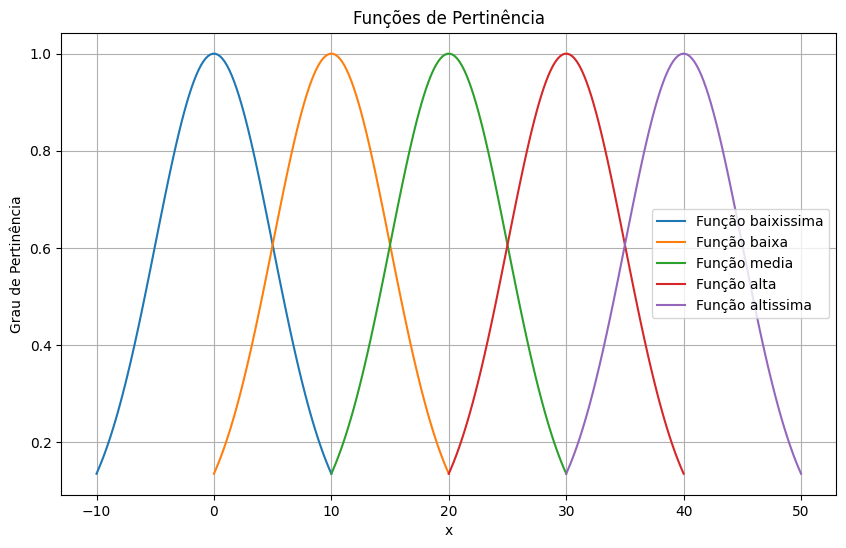

In [69]:
# Definição dos intervalos, tipos e parâmetros
intervalos = [
    (-10, 10),  # Intervalo para "baixíssima"
    (0, 20),    # Intervalo para "baixa"
    (10, 30),   # Intervalo para "média"
    (20, 40),   # Intervalo para "alta"
    (30, 50)    # Intervalo para "altíssima"
]

classificacao = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types = ['gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian']

# Parâmetros ajustados para a função gaussiana
params = [
    [0, 5],     # Centro no meio do intervalo (-10, 10), largura controlada por sigma
    [10, 5],    # Centro no meio do intervalo (0, 20), largura controlada por sigma
    [20, 5],    # Centro no meio do intervalo (10, 30), largura controlada por sigma
    [30, 5],    # Centro no meio do intervalo (20, 40), largura controlada por sigma
    [40, 5]     # Centro no meio do intervalo (30, 50), largura controlada por sigma
]

# Função para calcular os graus de pertinência
results = calculate_membership(intervalos, types, params)

# Função para plotar os resultados
plot_membership(intervalos, results, classificacao)

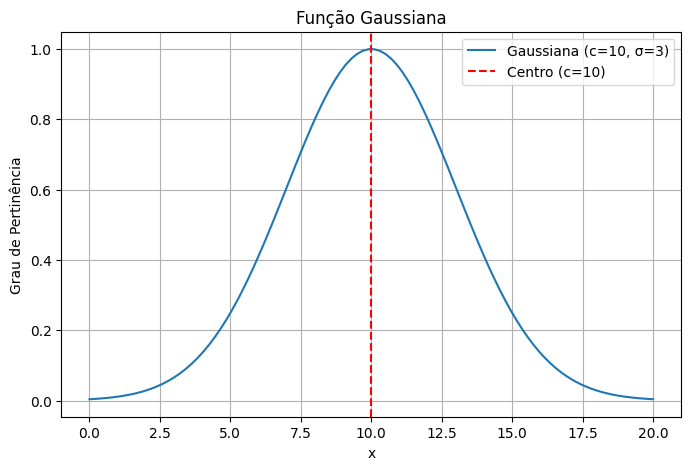

In [70]:
# Função Gaussiana
def gaussian(x, c, sigma):
    """
    Calcula a pertinência usando a função gaussiana.

    :param x: Valor de entrada.
    :param c: Centro da curva (onde a pertinência é máxima).
    :param sigma: Desvio padrão (controla a largura da curva).
    :return: Grau de pertinência (entre 0 e 1).
    """
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

# Exemplo de uso
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]
c = 10  # Centro da curva (onde a pertinência é máxima)
sigma = 3  # Largura da curva

# Calcula os graus de pertinência
y = [gaussian(val, c, sigma) for val in x]

# Plotando a função gaussiana
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"Gaussiana (c={c}, σ={sigma})")
plt.title("Função Gaussiana")
plt.xlabel("x")
plt.ylabel("Grau de Pertinência")
plt.axvline(c, color='red', linestyle='--', label=f"Centro (c={c})")
plt.legend()
plt.grid()
plt.show()

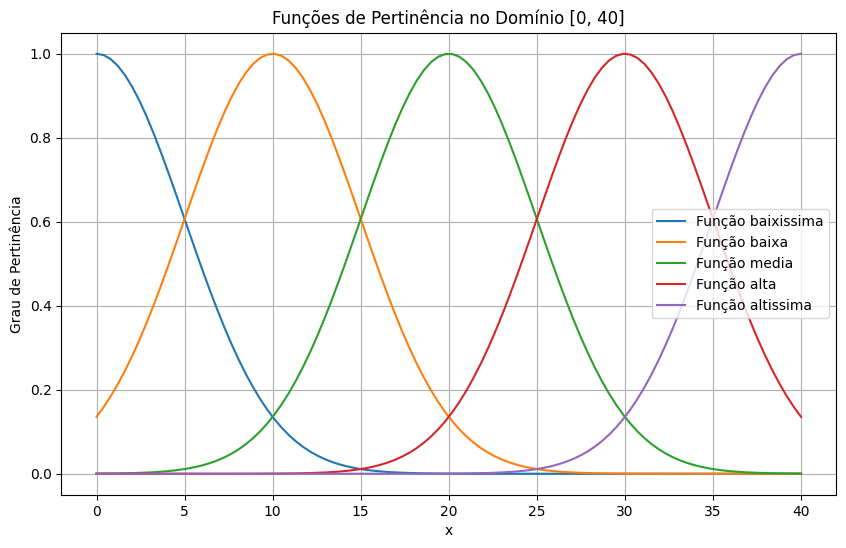

In [71]:
# Definição do domínio
dominio = (0, 40)  # O domínio será de 0 a 40

# Definição dos intervalos, tipos e parâmetros
intervalos = [
    (-10, 10),  # Intervalo para "baixíssima"
    (0, 20),    # Intervalo para "baixa"
    (10, 30),   # Intervalo para "média"
    (20, 40),   # Intervalo para "alta"
    (30, 50)    # Intervalo para "altíssima"
]

classificacao = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types = ['gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian']

# Parâmetros ajustados para a função gaussiana
params = [
    [0, 5],     # Centro no meio do intervalo (-10, 10), largura controlada por sigma
    [10, 5],    # Centro no meio do intervalo (0, 20), largura controlada por sigma
    [20, 5],    # Centro no meio do intervalo (10, 30), largura controlada por sigma
    [30, 5],    # Centro no meio do intervalo (20, 40), largura controlada por sigma
    [40, 5]     # Centro no meio do intervalo (30, 50), largura controlada por sigma
]

# Função para calcular os graus de pertinência no domínio
def calculate_membership_with_domain(dominio, intervalos, types, params):
    """
    Calcula os graus de pertinência para os valores no domínio especificado.

    :param dominio: Tupla (min, max) definindo o domínio.
    :param intervalos: Lista de tuplas (min, max) definindo os intervalos de cada função.
    :param types: Lista de strings indicando os tipos de funções de pertinência.
    :param params: Lista de listas com os parâmetros para cada função de pertinência.
    :return: Lista de listas com os graus de pertinência para cada tipo.
    """
    x = np.linspace(dominio[0], dominio[1], 100)  # Gera os valores de x no domínio
    results = []

    for func_type, func_params in zip(types, params):
        if func_type == 'gaussian':
            results.append([gaussian(val, *func_params) for val in x])
        else:
            raise ValueError(f"Tipo de função desconhecido: {func_type}")

    return x, results

# Calcular os graus de pertinência no domínio
x, results = calculate_membership_with_domain(dominio, intervalos, types, params)

# Função para plotar os resultados
def plot_membership_with_domain(x, results, classificacao):
    """
    Plota as funções de pertinência com base no domínio e nos resultados calculados.

    :param x: Valores do domínio.
    :param results: Lista de listas com os graus de pertinência calculados.
    :param classificacao: Lista de nomes descritivos para cada função de pertinência.
    """
    plt.figure(figsize=(10, 6))

    for i, result in enumerate(results):
        plt.plot(x, result, label=f"Função {classificacao[i]}")

    plt.legend()
    plt.title("Funções de Pertinência no Domínio [0, 40]")
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")
    plt.grid()
    plt.show()

# Plotar os resultados
plot_membership_with_domain(x, results, classificacao)